# fastai

## 이미지 인식 모델 

In [ ]:
!pip install ipywidgets
from ipywidgets import *

     -------------------------------------- 137.8/137.8 kB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 6.5 MB/s eta 0:00:00
     ------------------------------------- 384.3/384.3 kB 12.1 MB/s eta 0:00:00


In [5]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images' #데이터셋 경로를 Path 객체로 반환

In [5]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate) #합성곱 신경망(CNN) 생성
learn.fine_tune(1) #이미지 학습 횟수(epoch=1)

epoch,train_loss,valid_loss,error_rate,time
0,0.152633,0.021434,0.008119,23:25


epoch,train_loss,valid_loss,error_rate,time
0,0.055597,0.013992,0.004060,32:32


In [26]:
pip install fastbook

     -------------------------------------- 719.8/719.8 kB 9.1 MB/s eta 0:00:00
     ------------------------------------- 452.9/452.9 kB 13.8 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 10.3 MB/s eta 0:00:00
     ---------------------------------------- 123.4/123.4 kB ? eta 0:00:00
     ---------------------------------------- 5.8/5.8 MB 7.8 MB/s eta 0:00:00
     -------------------------------------- 245.3/245.3 kB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 1.6/1.6 MB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 20.3/20.3 MB 9.8 MB/s eta 0:00:00
     -------------------------------------- 323.5/323.5 kB 9.8 MB/s eta 0:00:00
     -------------------------------------- 132.9/132.9 kB 4.0 MB/s eta 0:00:00
     ------------------------------------- 182.4/182.4 kB 11.5 MB/s eta 0:00:00
     ------------------------------------ 110.5/110.5 kB 

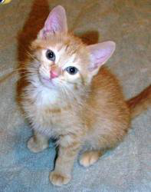

In [28]:
from fastbook import *
img = PILImage.create(image_cat())
img.to_thumb(192)

In [38]:
uploader = SimpleNamespace(data = ['cat.jfif'])

In [39]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


## 세그먼테이션(이미지의 모든 개별 픽셀 인식 모델) 모델 학습

In [8]:
import numpy as np

In [42]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.080161,2.788105,00:55


epoch,train_loss,valid_loss,time
0,1.886534,1.516659,01:04
1,1.617294,1.285623,00:57
2,1.468994,1.368677,00:52
3,1.344914,0.930620,00:52
4,1.200889,0.827943,00:52
5,1.076874,0.759174,00:53
6,0.978435,0.737963,00:55
7,0.900474,0.739208,01:03


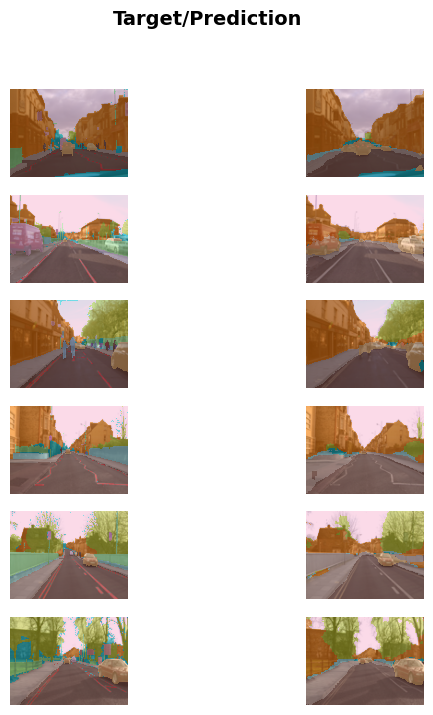

In [43]:
learn.show_results(max_n=6, figsize=(7,8)) #모델 이미지의 각 픽셀에 색상 코드 입히기

## 영화 리뷰 감정 분류 모델

In [1]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.456753,0.381982,0.828720,1:27:45


epoch,train_loss,valid_loss,accuracy,time
0,0.301730,0.248170,0.899440,3:36:23
1,0.232694,0.220331,0.913760,3:47:47
2,0.190885,0.191361,0.926520,4:03:10
3,0.153970,0.194685,0.929480,3:12:23


In [2]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([1.0970e-05, 9.9999e-01]))

In [3]:
# fastai method 확인법 예시
# doc(learn.predict)

## 사회경제적 배경 기반 고소득자 예측 모델

In [45]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [46]:
learn.fit_one_cycle(3) #모델을 밑바닥부터 학습시킬 때 사용

epoch,train_loss,valid_loss,accuracy,time
0,0.380468,0.361911,0.830467,00:29
1,0.378068,0.355967,0.834920,00:27
2,0.364292,0.347990,0.836149,00:15


## 사람들이 좋아할 만한 영화 예측 모델 학습

In [47]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.480489,1.471095,00:01


epoch,train_loss,valid_loss,time
0,1.353195,1.414264,00:01
1,1.269157,1.235149,00:01
2,1.035432,0.908774,00:01
3,0.805188,0.741191,00:01
4,0.690747,0.698794,00:01
5,0.640983,0.683932,00:01
6,0.621787,0.677374,00:01
7,0.604170,0.674734,00:01
8,0.596923,0.673574,00:01
9,0.598021,0.673434,00:01


In [48]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,80.0,24.0,2.0,3.255287
1,96.0,96.0,4.5,3.174969
2,33.0,14.0,5.0,4.215013
3,18.0,47.0,4.0,4.007433
4,19.0,39.0,3.0,4.061997
5,69.0,99.0,4.0,4.091255
6,8.0,73.0,4.0,4.236697
7,85.0,80.0,5.0,4.580994
8,20.0,88.0,2.0,3.850363
